In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/muhammadumar/anaconda3/envs/ml_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_rows', 70)

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [5]:
df.isnull().values.any()

False

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


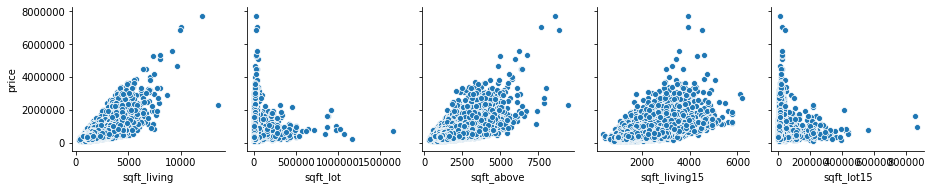

In [7]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=['price'])

In [23]:
df2 = df[['price', 'sqft_living']]

In [25]:
df2.head()

,price,sqft_living
0,221900.00,1180
1,538000.00,2570
2,180000.00,770
3,604000.00,1960
4,510000.00,1680


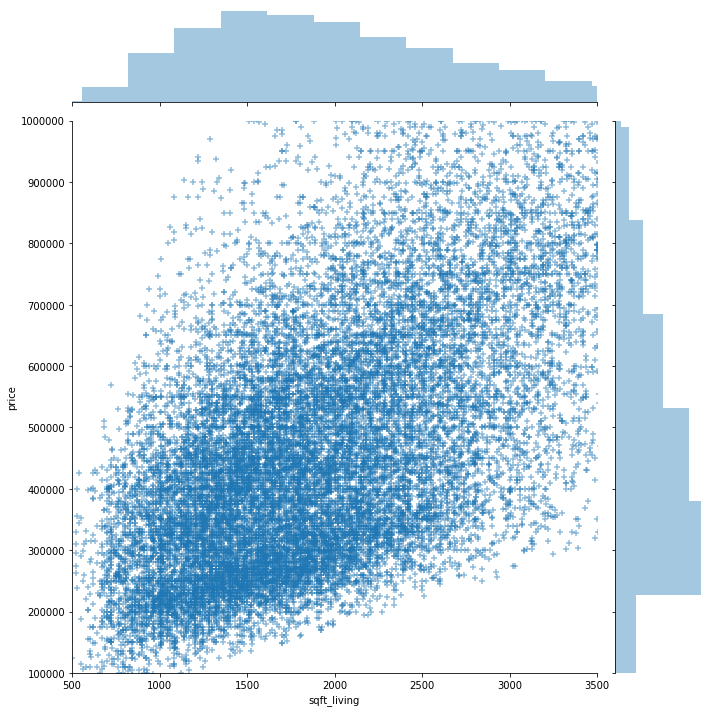

In [34]:
sns.jointplot('sqft_living','price', data=df2, size=10, xlim=(500,3500), ylim=(100000,1000000), alpha=.5, marker='+')

In [38]:
print(df['zipcode'].nunique())
# df['zipcode'].value_counts()

70


In [39]:
df.groupby('zipcode')['price'].mean()

zipcode
98001    280804.69
98002    234284.04
98003    294111.28
98004   1355927.08
98005    810164.88
98006    859684.78
98007    617105.09
98008    645507.38
98010    423665.99
98011    490351.47
98014    455617.11
98019    424788.75
98022    315709.30
98023    286732.79
98024    580526.79
98027    616990.59
98028    462480.04
98029    612653.61
98030    296187.98
98031    300539.89
98032    251296.24
98033    803719.52
98034    521652.86
98038    366867.60
98039   2160606.60
98040   1194230.02
98042    311632.11
98045    439471.08
98052    645231.46
98053    678163.06
98055    304262.11
98056    420890.55
98058    353608.64
98059    493552.53
98065    527961.20
98070    487479.63
98072    569958.47
98074    685605.78
98075    790576.65
98077    682774.88
98092    334921.06
98102    901258.27
98103    584919.21
98105    862825.23
98106    319581.39
98107    579053.42
98108    355678.52
98109    879623.62
98112   1095499.34
98115    619900.55
98116    618634.17
98117    576795.01
9811

In [40]:
zip98103 = df['zipcode'] == 98103  # True if zip is 98103
zip98039 = df['zipcode'] == 98039

/home/muhammadumar/anaconda3/envs/ml_env/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


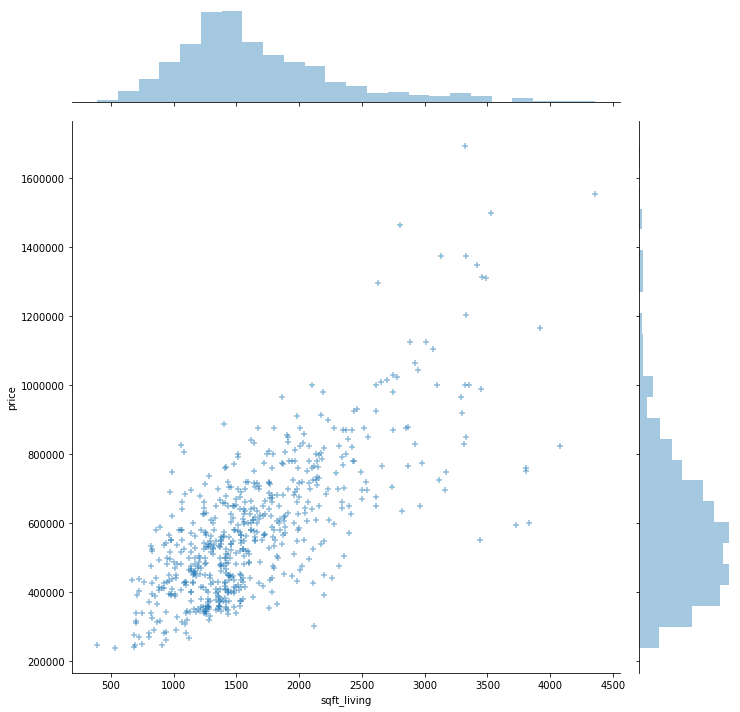

In [43]:
sns.jointplot('sqft_living', 'price', data=df2[zip98103], size=10, alpha=.5, marker='+')

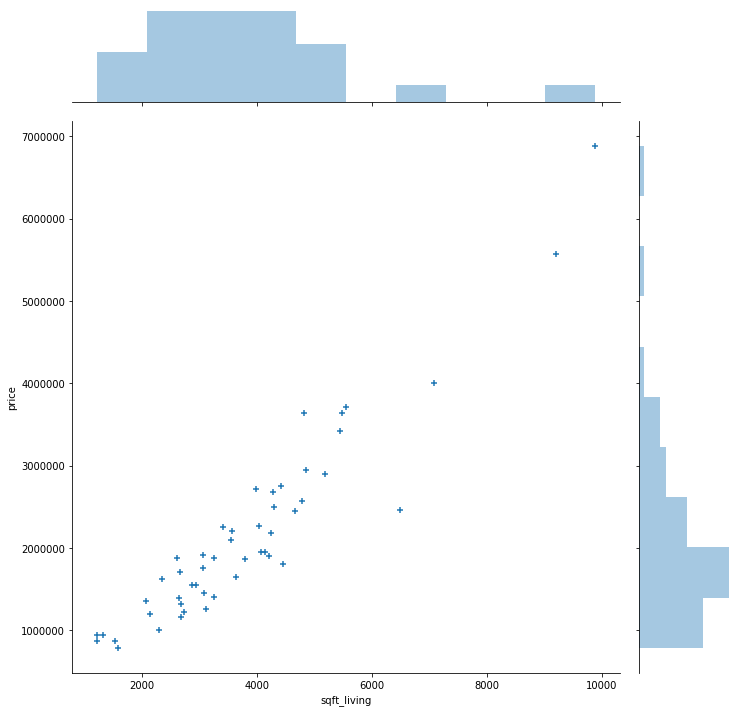

In [52]:
sns.jointplot('sqft_living','price', data=df2[zip98039], size=10, alpha=1, marker='+')

In [47]:
df_98039 = df2[zip98039]
df_98039.describe()

,price,sqft_living
count,50.00,50.00
mean,2160606.60,3800.90
std,1166477.34,1764.50
min,787500.00,1220.00
25%,1401000.00,2680.00
50%,1892500.00,3560.00
75%,2556250.00,4452.50
max,6885000.00,9890.00


In [53]:
df_98039.to_csv('df_98039.csv', index=False)